In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint, solve_ivp
from scipy.interpolate import CubicSpline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
a = os.listdir()
datasets_2 = []
int_list = []

for i in a:
    if ".npz" in i:
        temp = i.split("_")[1]
        if temp == "3":
            datasets_2.append(i)
    elif ".txt" in i:
        temp = i.split("_")[0]
        if temp == "Initial":
            int_list.append(np.loadtxt(i))

In [3]:
datasets_2

['HMI_3_fl.npz', 'MLM_3_fl.npz', 'PM_3_fl.npz']

In [4]:
model_dict = {}

for i in datasets_2:
    n_d = i.split("_")[0]
    
    if n_d not in model_dict.keys():
        model_dict[n_d] = []
        z = np.load(i)["Extrapolation"]
        model_dict[n_d].append(z)
    
    else:
        z = np.load(i)["Extrapolation"]
        model_dict[n_d].append(z)
        
for i in model_dict.keys():
    temp_a = np.array(model_dict[i])
    
    n_d, n_s, n_p = np.shape(temp_a)
    
    for r in range(n_d):
        for c in range(n_s):
            for k in range(n_p):
                if temp_a[r,c,k] < 0:
                    temp_a[r,c,k] = 0
    
    mean = np.mean(temp_a, axis = 0)
    model_dict[i] = mean

In [5]:
a = np.array(int_list)

Cg_min = np.min(a[:,:,2])
Cc_min = np.min(a[:,:,-1])

Cg_max = np.max(a[:,:,2])
Cc_max = np.max(a[:,:,-1])

In [6]:
x_min = (30/50)*(Cc_min - 5)
x_max = (30/50)*(Cc_max - 5)

y_min = (30/80)*(Cg_min - 20)
y_max = (30/80)*(Cg_max - 20)

In [7]:
model_dict.keys()

dict_keys(['HMI', 'MLM', 'PM'])

MLM
PM
HMI


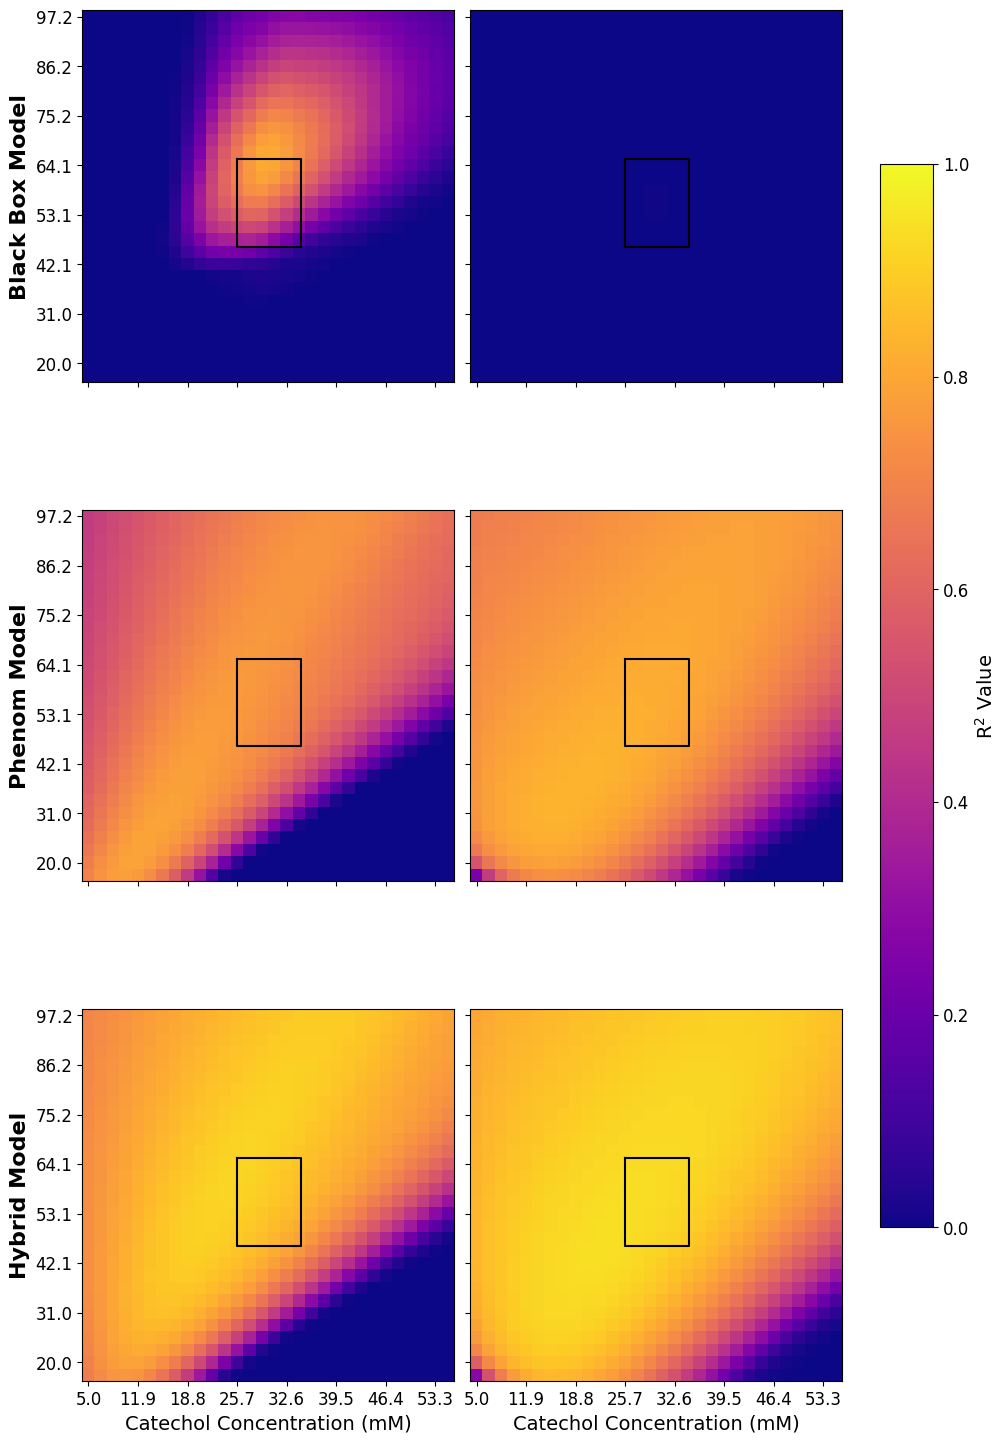

In [8]:
cmap = "plasma"
vmin = 0
vmax = 1
titles = {"MLM" : "Black Box Model", "PM": "Phenom Model", "HMI" : "Hybrid Model"}
keys = list(titles.keys())

Cg_range = np.linspace(20, 100, 30)
Cc_range = np.linspace(5, 55, 30)

Xv_const = 0.01


# Create a figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(10,15), constrained_layout=True, sharex = True, sharey = True)

for z in range(len(keys)):
    print(keys[z])
    data1 =  np.flipud(model_dict[keys[z]][0].reshape(30,30))
    data2 =  np.flipud(model_dict[keys[z]][1].reshape(30,30))

    # Create heatmaps
    im1 = axes[z,0].imshow(data1, cmap= cmap, vmin=vmin, vmax=vmax)
    x_label = []
    for i in Cc_range[::4]:
        x_label.append(round(i,1))
    y_label = []
    for i in np.flipud(Cg_range[::4]):
        y_label.append(round(i,1))
    axes[z,0].set_xticks(ticks = np.arange(30)[::4], labels = x_label, fontsize = 12)
    axes[z,0].set_yticks(ticks = np.arange(30)[::4], labels = y_label, fontsize = 12)
    if z == 2: 
        axes[z,0].set_xlabel("Catechol Concentration (mM)", fontsize = 14)
    #axes[z,0].set_ylabel("Glucose Concentration (mM)", fontsize = 14)
    axes[z,0].plot([x_min, x_max, x_max, x_min, x_min],[y_min, y_min, y_max, y_max, y_min ],"k")
    axes[z,0].set_ylabel(titles[keys[z]], fontsize = 16, fontweight = "bold")

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    im2 = axes[z,1].imshow(data2, cmap= cmap, vmin=vmin, vmax=vmax)
    x_label = []
    for i in Cc_range[::4]:
        x_label.append(round(i,1))
    y_label = []
    for i in np.flipud(Cg_range[::4]):
        y_label.append(round(i,1))
    axes[z,1].set_xticks(ticks = np.arange(30)[::4], labels = x_label, fontsize = 12)
    axes[z,1].set_yticks(ticks = np.arange(30)[::4], labels = y_label, fontsize = 12)
    if z == 2:
        axes[z,1].set_xlabel("Catechol Concentration (mM)", fontsize = 14)
    axes[z,1].plot([x_min, x_max, x_max, x_min, x_min],[y_min, y_min, y_max, y_max, y_min ],"k")


    # Add a common color bar
imz = im2
cbar = fig.colorbar(imz, ax=axes, orientation='vertical', fraction=0.07, pad=0.05)
cbar.set_label('R$^2$ Value', fontsize = 14)
cbar.ax.tick_params(labelsize = 12)
#plt.savefig("ML_PM_HM.svg")

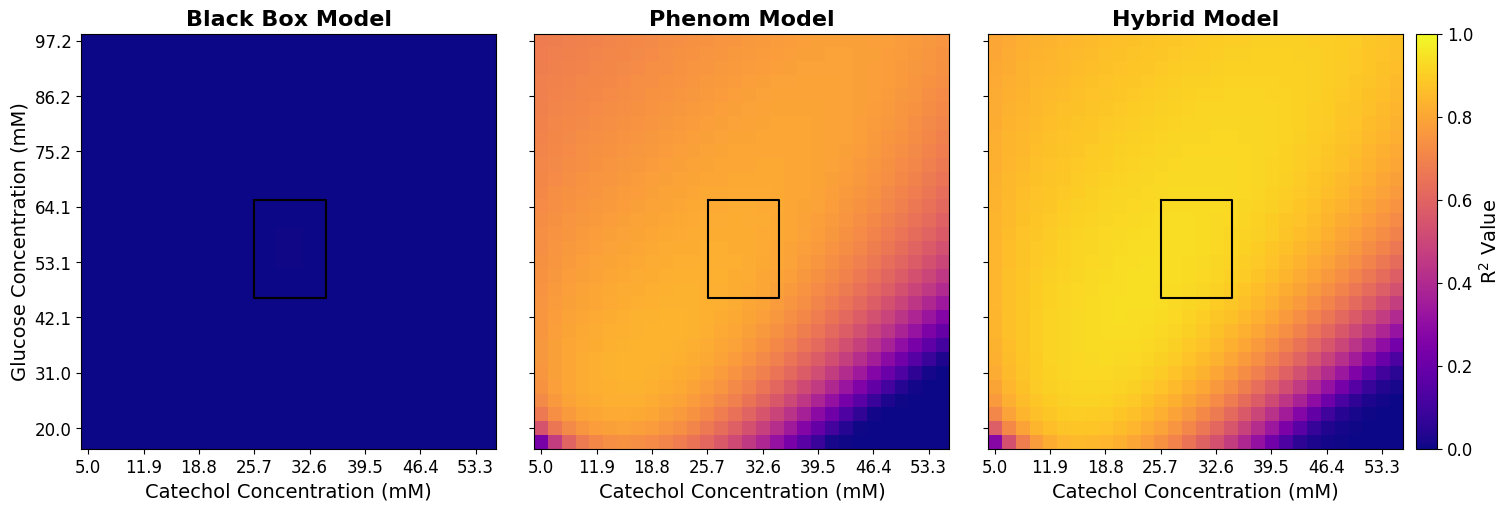

In [11]:
cmap = "plasma"
vmin = 0
vmax = 1
titles = {"MLM" : "Black Box Model", "PM": "Phenom Model", "HMI" : "Hybrid Model"}
keys = list(titles.keys())

Cg_range = np.linspace(20, 100, 30)
Cc_range = np.linspace(5, 55, 30)

Xv_const = 0.01


# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True, sharex = True, sharey = True)

for z in range(len(keys)):
    data1 =  np.flipud(model_dict[keys[z]][1].reshape(30,30))

    # Create heatmaps
    im1 = axes[z].imshow(data1, cmap= cmap, vmin=vmin, vmax=vmax)
    x_label = []
    for i in Cc_range[::4]:
        x_label.append(round(i,1))
    y_label = []
    for i in np.flipud(Cg_range[::4]):
        y_label.append(round(i,1))
    axes[z].set_xticks(ticks = np.arange(30)[::4], labels = x_label, fontsize = 12)
    axes[z].set_yticks(ticks = np.arange(30)[::4], labels = y_label, fontsize = 12) 
    axes[z].set_xlabel("Catechol Concentration (mM)", fontsize = 14)
    if z == 0:
        axes[z].set_ylabel("Glucose Concentration (mM)", fontsize = 14)
    axes[z].plot([x_min, x_max, x_max, x_min, x_min],[y_min, y_min, y_max, y_max, y_min ],"k")
    axes[z].set_title(titles[keys[z]], fontsize = 16, fontweight = "bold")


    # Add a common color bar
imz = im2
cbar = fig.colorbar(imz, ax=axes, orientation='vertical', fraction=0.07, pad=0.01)
cbar.set_label('R$^2$ Value', fontsize = 14)
cbar.ax.tick_params(labelsize = 12)
plt.savefig("GMO_hpb.svg")

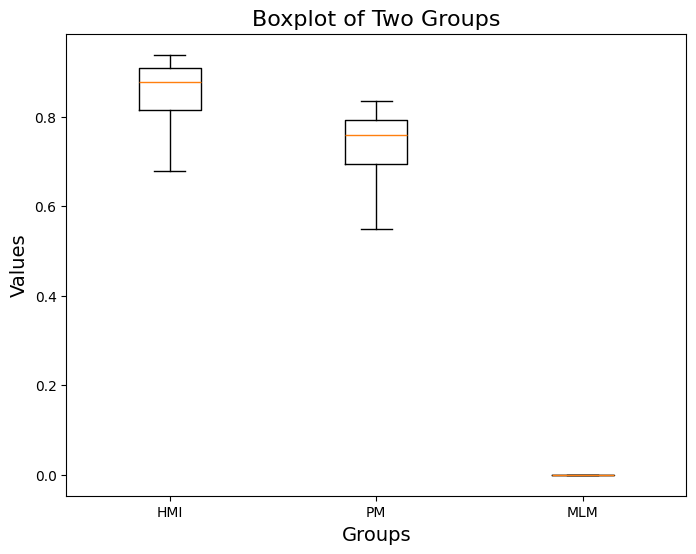

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data for two groups
data1 = model_dict["HMI"][1]  # Group 1 data
data2 = model_dict["PM"][1]
data3 = model_dict["MLM"][1]# Group 2 data

# Combine data into a list for plotting
data = [data1, data2, data3]

# Create the boxplot
plt.figure(figsize=(8, 6))  # Set figure size
plt.boxplot(data, labels=['HMI', 'PM', "MLM"], showfliers = False)  # Add labels for the x-axis

# Add axis labels
plt.xlabel('Groups', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Add a title (optional)
plt.title('Boxplot of Two Groups', fontsize=16)

# Show the plot
plt.show()


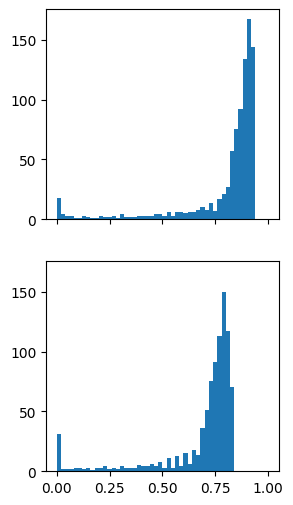

In [11]:
fig, axs = plt.subplots(2,1, figsize = (3,6), sharex = True, sharey = True)
ax = axs.ravel()

ax[0].hist(data1, bins = np.linspace(0,1,51))
ax[1].hist(data2, bins = np.linspace(0,1,51))
#ax[2].hist(data3, bins = np.linspace(0,1,51))
plt.show()